<h1>Unsupervised Learning Notebook: Mall Customers.</h1>


we will test out one of the most popular unsupervised algorithms to create the customer segments of the mall using data collected from this mall. Through membership cards,we have some basic information about the customers like Customer ID, age, gender, annual income and spending score.
We will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Our goal with this implementation is to build a machine learning model to initialize the K number of centroids in the data and then find the optimal number of clusters using the Elbow method for that.To get some good results from our implementation we are going to go through the steps involved in K means clustering.
.1) Select the number of clusters for the dataset ( K )
.2) Select K number of centroids
.3) By calculating the Euclidean distance or Manhattan distance assign the points to the nearest centroid, thus creating K groups
.4) Now find the original centroid in each group
.5) Again reassign the whole data point based on this new centroid, then repeat step 4 until the position of the centroid doesn’t change.









Import python libraries for building and testing machine learning models.

In [70]:
#import python libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [71]:
#upload the dataset for exploring
dataset_cluster=pd.read_csv('Mall_Customers.csv')
#Have a look at top 10 rows of the dataset
dataset_cluster.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [72]:
#let's choose the numeric columns
dataset=dataset_cluster[["Age", "Annual Income (k$)","Spending Score (1-100)"]]
dataset.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<h2>Exploratory Data Analysis:</h2>

Exploratory Data Analysis refers to the critical process of performing initial investigations on data to discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations. we are going to explore every column in the dataset to gain insights


<h3>Dataset Description</h3>
Let's take a look at the following features about each customer in the database:
.format(Customer id,Age,Annual income,Spending score,Gender))
Customer id : define the id of a customer 
Age: defines the customer's age 
Annual income: defines the annual income for each customer
Spending score: defines the spending score for each customer during a period
Gender: defines the customer's gender 

In [73]:
#Let's check the missing data
print(dataset.isnull().sum())

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


The dataset does not contains the missing data.

In [74]:
#Checking out the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [75]:
#check out duplicated values
print(dataset.duplicated())            

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


The dataset does not contains the duplicated data.

In [76]:
#let's see how is the correlation looks like
correlations= dataset.corr()
correlations

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


As we can see there is no linear relationship between the variables.

In [77]:
#The describe() method shows a summary of the numerical attributes
print(dataset.describe())

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


As we can see the mean of annual income of customer is 60.560000 dollars,the mean of spending score of customer is 50.2000 dollars,the max annual income of the customer is 137.000000 dollars and the max spending score of customer is 99.00000 dollars.


In [78]:
#Rename columns
dataset.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':\
                                'Spending_Score'}, inplace= True)

In [79]:
#let's verify the employee earned the max annual income
print(dataset[dataset["Annual_Income"]==137.000000])    
#clusters[clusters["Spending_Score"]==99.000000]

     Age  Annual_Income  Spending_Score
198   32            137              18
199   30            137              83


we have two customers that have earned the maximum annual income in the data, the first one is 32 years old, he has a customer id 198, and his spending score is equal to 18.000 dollars. The second, is 30 years old, he has a customer id 199, and his spending score is equal to 83.0000 dollars

<h3>Data visualization:</h3>
Let's plot a histogram of these four features and see how they are distributed.

A good way to visualize the distribution of a numeric variable is a histogram. But what do they consist of? Histograms are a way of displaying the distribution of a dataset by plotting the number or percentage of observations whose values ​​fall within predefined numerical ranges and then plotting those numbers or percentages on a bar chart. That is, in a histogram, the data is placed in intervals and the height of the bars represents the number of cases that fall in each interval. In other words, a histogram provides a view of data density.

Distributions can be unimodal with one prominent peak, bimodal with two prominent peaks, or uniform without prominent peaks. With more than two prominent peaks a distribution is generally said to be multimodal.




AxesSubplot(0.125,0.125;0.775x0.755)


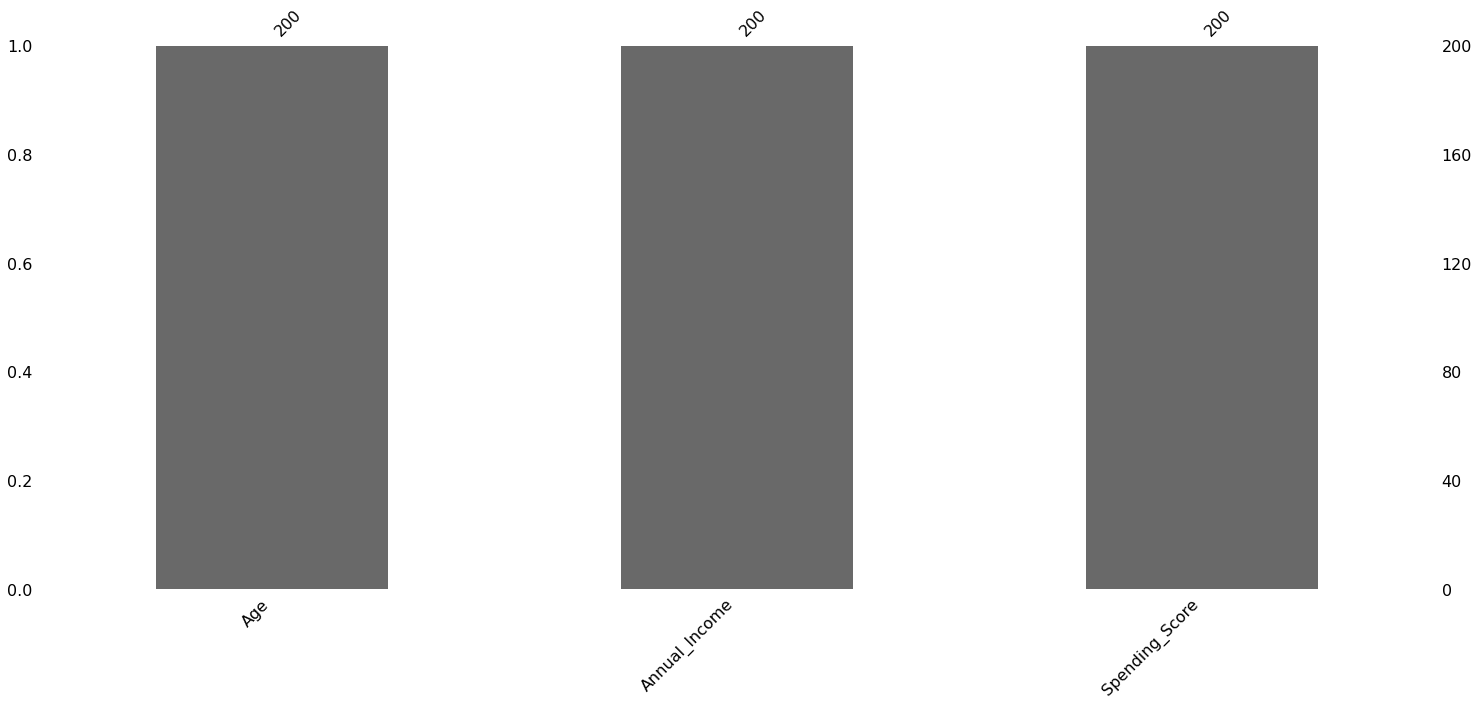

In [81]:
#check out missing data with msno 
print(msno.bar(dataset))

AxesSubplot(0.125,0.125;0.62x0.755)


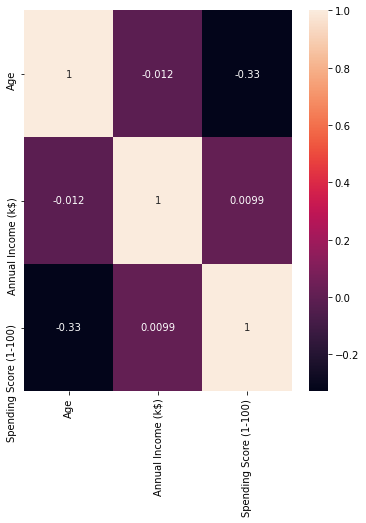

In [82]:
#matrix of correlation
f, ax= plt.subplots(figsize=(6,7))
print(sns.heatmap(correlations, annot=True))

C:\Users\gchri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


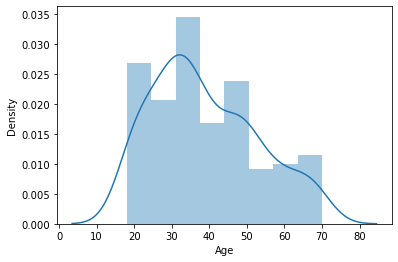

In [12]:
#let's see how the distribution of the attribute age looks like
sns.distplot(dataset.Age);


C:\Users\gchri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


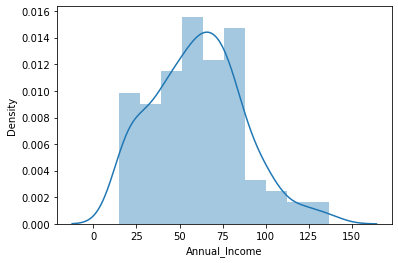

In [25]:
#let's see how the distribution of the attribute age looks like
sns.distplot(dataset.Annual_Income);

In [24]:
from scipy import stats
print(stats.skew(dataset.Age))

0.48191947090957177


In [26]:
from scipy import stats
print(stats.skew(dataset.Annual_Income))

0.319423684276314


In [58]:
#Apply minmax
minmax = MinMaxScaler()
minmax.fit(dataset)
normalize = minmax.transform(dataset)
normalize=pd.DataFrame(normalize, columns=["Age", "Annual_Income", "Spending_Score"])
normalize.head()

,Age,Annual_Income,Spending_Score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [59]:
#let's fit kmeans model
kmeans = KMeans(2)
kmeans.fit(normalize)
clusters = kmeans.fit_predict(normalize)
clusters

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

<h3>K-Means machine learning model:</h3>
K-Means Clustering Algorithm in Machine Learning,clustering is an unsupervised machine learning technique. It is the process of division of the dataset into groups in which the members in the same group possess similarities in features. The commonly used clustering algorithms are K-Means clustering, Hierarchical clustering, Density-based clustering, Model-based clustering, etc.


In [69]:
#Let's remove unnecessaries variable
#x_feature=normalize.iloc[:, [1, 2]]
#x_feature.head(2)

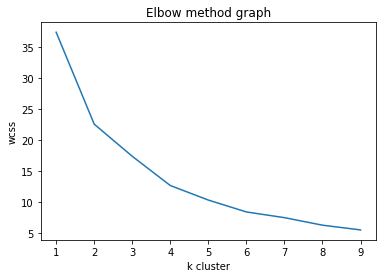

In [64]:
#Let's remove unnecessaries variable
#x_feature=dataset_cluster.iloc[:, [3, 4]]

#using kmeans for clustering
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 10 ):
    kmeans_clusters= KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
    kmeans_clusters.fit(normalize)
    wcss.append(kmeans_clusters.inertia_)
    
    
plt.plot(range(1, 10), wcss)
plt.title('Elbow method graph')
plt.xlabel('k cluster')
plt.ylabel('wcss')
plt.show()    

<AxesSubplot:xlabel='Spending_Score', ylabel='Annual_Income'>

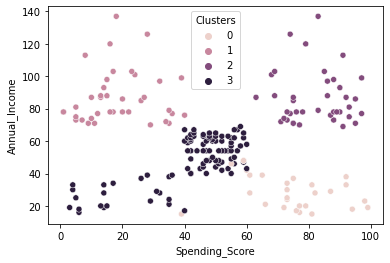

In [68]:
#Geração dos clusters
kmeans = KMeans(n_clusters=4 ,init="k-means++")
kmeans = kmeans.fit(dataset)
dataset['Clusters'] = kmeans.labels_
sns.scatterplot(x="Spending_Score", y="Annual_Income",hue = 'Clusters',\
                data=dataset)

<h3>Conclusion</h3>

After following step by step all the phases of the data science project life cycle. K-means clustering algorithm was the model selected to make the segmentation of customers. we defined the optimal number of clusters equal to five using the Elbow method, we discovered that cluster number 3 and cluster number5 are groups in which the customers possess the same similarities in features. They have much more annual income and have less spending score.

In the upcoming step, we can set more numbers of clusters or decrease the number of clusters.